<a href="https://colab.research.google.com/github/MaheshGouru/CS5265-Assignment-1/blob/main/CS5265_Assignment_1_Gouru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
With the rise of GPUs accelerating workloads for notably Apple's Neural Engine, Electric Vehicles autonomous functionalities, and data-mining for medicine, generating a benchmark for which configurations would be sufficiently suited for a developer would enable affordability, accessibility, and scalability amongst heterogenous architectures. Hosted on the UCI Machine Learning Repository as released from Enrique G. Paredes and Rafael Ballester-Ripoll of University of Zurich, the SGEMM GPU kernel performance Data Set publishes "running times for multiplying two 2048 x 2048 matrices using a GPU OpenCL SGEMM kernel with varying parameters (using the library 'CLTune')". SGEMM is short for "Single precision GEneral Matrix Multiply" which addresses matrix-matrix products of float 32 bits.

The dataset has 14 parameters with 10 are ordinal and 4 are categorical (binary).

The experiment used a workstation running Ubuntu 16.04 Linux with an Intel Core i5 (3.5GHz), 16GB RAM, and a NVidia Geforce GTX 680 4GB GF580 GTX-1.5GB GPU. This configuration can be replicated and reproduced for the sake of the exercise. The'gemm_fast' kernel from the automatic OpenCL kernel tuning library "CLTune" was used to interface the scripts with the GPU drivers.

# Project Description
Extracted from the dataset, the attribute information is as provided:

## Independent variables:
1-2. MWG, NWG: per-matrix 2D tiling at workgroup level: {16, 32, 64, 128} (integer)

3.&nbsp; KWG: inner dimension of 2D tiling at workgroup level: {16, 32} (integer)

4-5. MDIMC, NDIMC: local workgroup size: {8, 16, 32} (integer)

6-7. MDIMA, NDIMB: local memory shape: {8, 16, 32} (integer)

8.&nbsp; KWI: kernel loop unrolling factor: {2, 8} (integer)

9-10. VWM, VWN: per-matrix vector widths for loading and storing: {1, 2, 4, 8} (integer)

11-12. STRM, STRN: enable stride for accessing off-chip memory within a single thread: {0, 1} (categorical)

13-14. SA, SB: per-matrix manual caching of the 2D workgroup tile: {0, 1} (categorical)

The purpose would be interact with a wizard to recommend the most cost-effective configuration, such as those used on various cloud platforms like AWS, GCP, and Azure.

# Performance Metric(s)
The output are logged in columns 15-18. These columns log the performance times in milliseconds for 4 independent runs using the same parameters. As noted, the range is between 13.25 and 3397.08.

As cited, a proportion of this data set was used to compute a tensor train based predictive model and estimate the Sobol sensitivity indices of all the parameters which could then be replicated as well to go through the exercise of benchmarking architectures for industry applications such as provided by TrTransaction Processing Performance Council (TPC) for decision support.

#References
https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance
https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html

---

## Clarification on Datasets needed for the Project Assignments
Just to recap some important highlights of the datasets needed for the upcoming project assignments:

- Size: at least 5000 datapoints (samples/rows/records), less than 100,000 datapoints are recommended

- #&nbsp;of columns: at least 7 attributes/features/variables (columns) are needed 

- Types of columns: a good dataset will contain not only numerical columns but also categorical columns (e.g., gender, dates, or anything else that has a finite number of categories) 

Some resources for acquiring data: 

- https://www.kaggle.com/datasets

- https://datasetsearch.research.google.com/ 

- https://archive.ics.uci.edu/ml/datasets.php 
---

**III. Tasks**
> [Task 2] Basic EDA: Describe 3-5 questions you would like to answer by examining the data in the issue description/detail section in a separate TEXT cell in your Jupyter Notebook
1. What is the relationship between per-matrix 2D tiling at workgroup level and 
the inner dimension of 2D tiling at workgroup level?
2. What is the most used inner dimension of 2D tiling at workgroup level?
3. What is the fastest run after initial compiling?

In [1]:
# tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
gpus = pd.read_csv('https://raw.githubusercontent.com/MaheshGouru/CS5265-Assignment-1/main/sgemm_product.csv')
# gpus = sns.load_data('gpus')

display(gpus.sample(1))
gpus.info()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
163787,128,32,32,16,8,16,16,8,8,1,1,0,1,1,58.3,58.3,54.21,58.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


**Exploratory Data Analysis**

In [5]:
gpus['MWG'].value_counts()

128    99808
64     75584
32     47264
16     18944
Name: MWG, dtype: int64

In [6]:
gpus.isna().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

32    143648
16     97952
Name: KWG, dtype: int64

([<matplotlib.patches.Wedge at 0x7f106b4f63d0>,
 [Text(-0.32202233899583776, 1.0518087341278592, '32'),
  Text(0.3220224374732771, -1.0518087039779476, '16')])

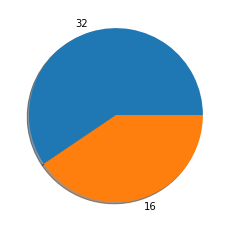

In [10]:
# Creating a pie chart to visualize porportions of the inner dimension of 2D 
# tiling at workgroup level in this data
methods_counts = gpus['KWG'].value_counts()
display(methods_counts)

plt.pie(methods_counts, labels=methods_counts.index, shadow = True)